### Задание 1 (к 24.11)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описание задачи
## Маркетинговая компания
Датасет содержит информацию связаную с кампаниями прямого маркетинга(телефонными звонками) португальского банковского учреждения.
Задачей классификации для данного датасета является орпеделение будет ли клиентом открыт срочный депозит.


# 1. Загрузка данных

In [2]:
dataset = "BankCustomerData.csv"
data_raw = pd.read_csv(dataset)

In [3]:
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


Категориальный признак `term_deposit` приведем к бинарному виду, заменив "no" на `0`, а "yes" yа `1`.

In [4]:
data_raw["term_deposit"] = np.where(data_raw["term_deposit"] == "no", 0, 1)

Мы видим, что столбцы (признаки) имеют имена

* `age` - возраст
* `job` - область деятельности
* `marital` - семейное положение
* `education` - образование
* `default` - наличие неуплаты долга
* `balance` - баланс счета клиента
* `housing` - наличие ипотеки
* `loan` - наличие потребительского кредита
* `contact` - способ связи с клиентом(мобильный/домашний телефон)
* `day` - день последнего звонка
* `month` - месяц последнего звонка
* `duration` - продолжительность звонка
* `campaign` - количество звонков
* `pdays` - количество дней прошедших с последнего звонка
* `previous` - кол-во звонков до начала кампании
* `poutcome` - результат предыдущей маркетинговой компании
* `term_deposit` - откроет ли клиент быстрый депозит(целевой признак)

Признаки `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous` - количественные признаки.\
Признаки `job`, `marital`, `education`, `contact`, `month`, `poutcome` - номинальные(категориальные) признаки.\
Признаки `default`, `housing`, `loan`, `term_deposit` - бинарные признаки.

# 2. Вычисление основных характеристик

Выведем основные метрические характеристики

* `count` - число значений
* `mean` - среднее арифметическое
* `std` - разброс
* `min` - минимальное значение
* `max` - максимальное значение

In [5]:
data_raw.describe()

,age,balance,day,duration,campaign,pdays,previous,term_deposit
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442,0.092896
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705,0.290290
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000,1.000000


Вычислим и выведем матрицу корреляции, чтобы определить возможные связи между признаками

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.4+ MB


In [7]:
corr_mat = data_raw.select_dtypes(include=np.number).corr()
corr_mat

,age,balance,day,duration,campaign,pdays,previous,term_deposit
age,1.000000,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279,0.009129
balance,0.088716,1.000000,0.004696,0.016721,-0.013358,-0.006797,0.005194,0.046826
day,-0.009869,0.004696,1.000000,-0.032557,0.165906,-0.101391,-0.048445,-0.024916
duration,-0.016529,0.016721,-0.032557,1.000000,-0.085640,-0.010812,-0.007730,0.417468
campaign,0.008296,-0.013358,0.165906,-0.085640,1.000000,-0.079981,-0.024374,-0.058095
pdays,-0.044165,-0.006797,-0.101391,-0.010812,-0.079981,1.000000,0.450869,0.033657
previous,-0.016279,0.005194,-0.048445,-0.007730,-0.024374,0.450869,1.000000,0.033238
term_deposit,0.009129,0.046826,-0.024916,0.417468,-0.058095,0.033657,0.033238,1.000000


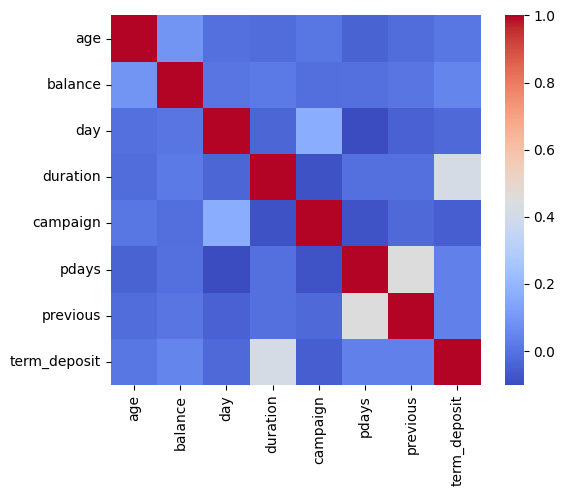

In [8]:
sns.heatmap(corr_mat, square=True, cmap="coolwarm")
pass

Из полученных данных видим, что признаки не коррелируют между собой.

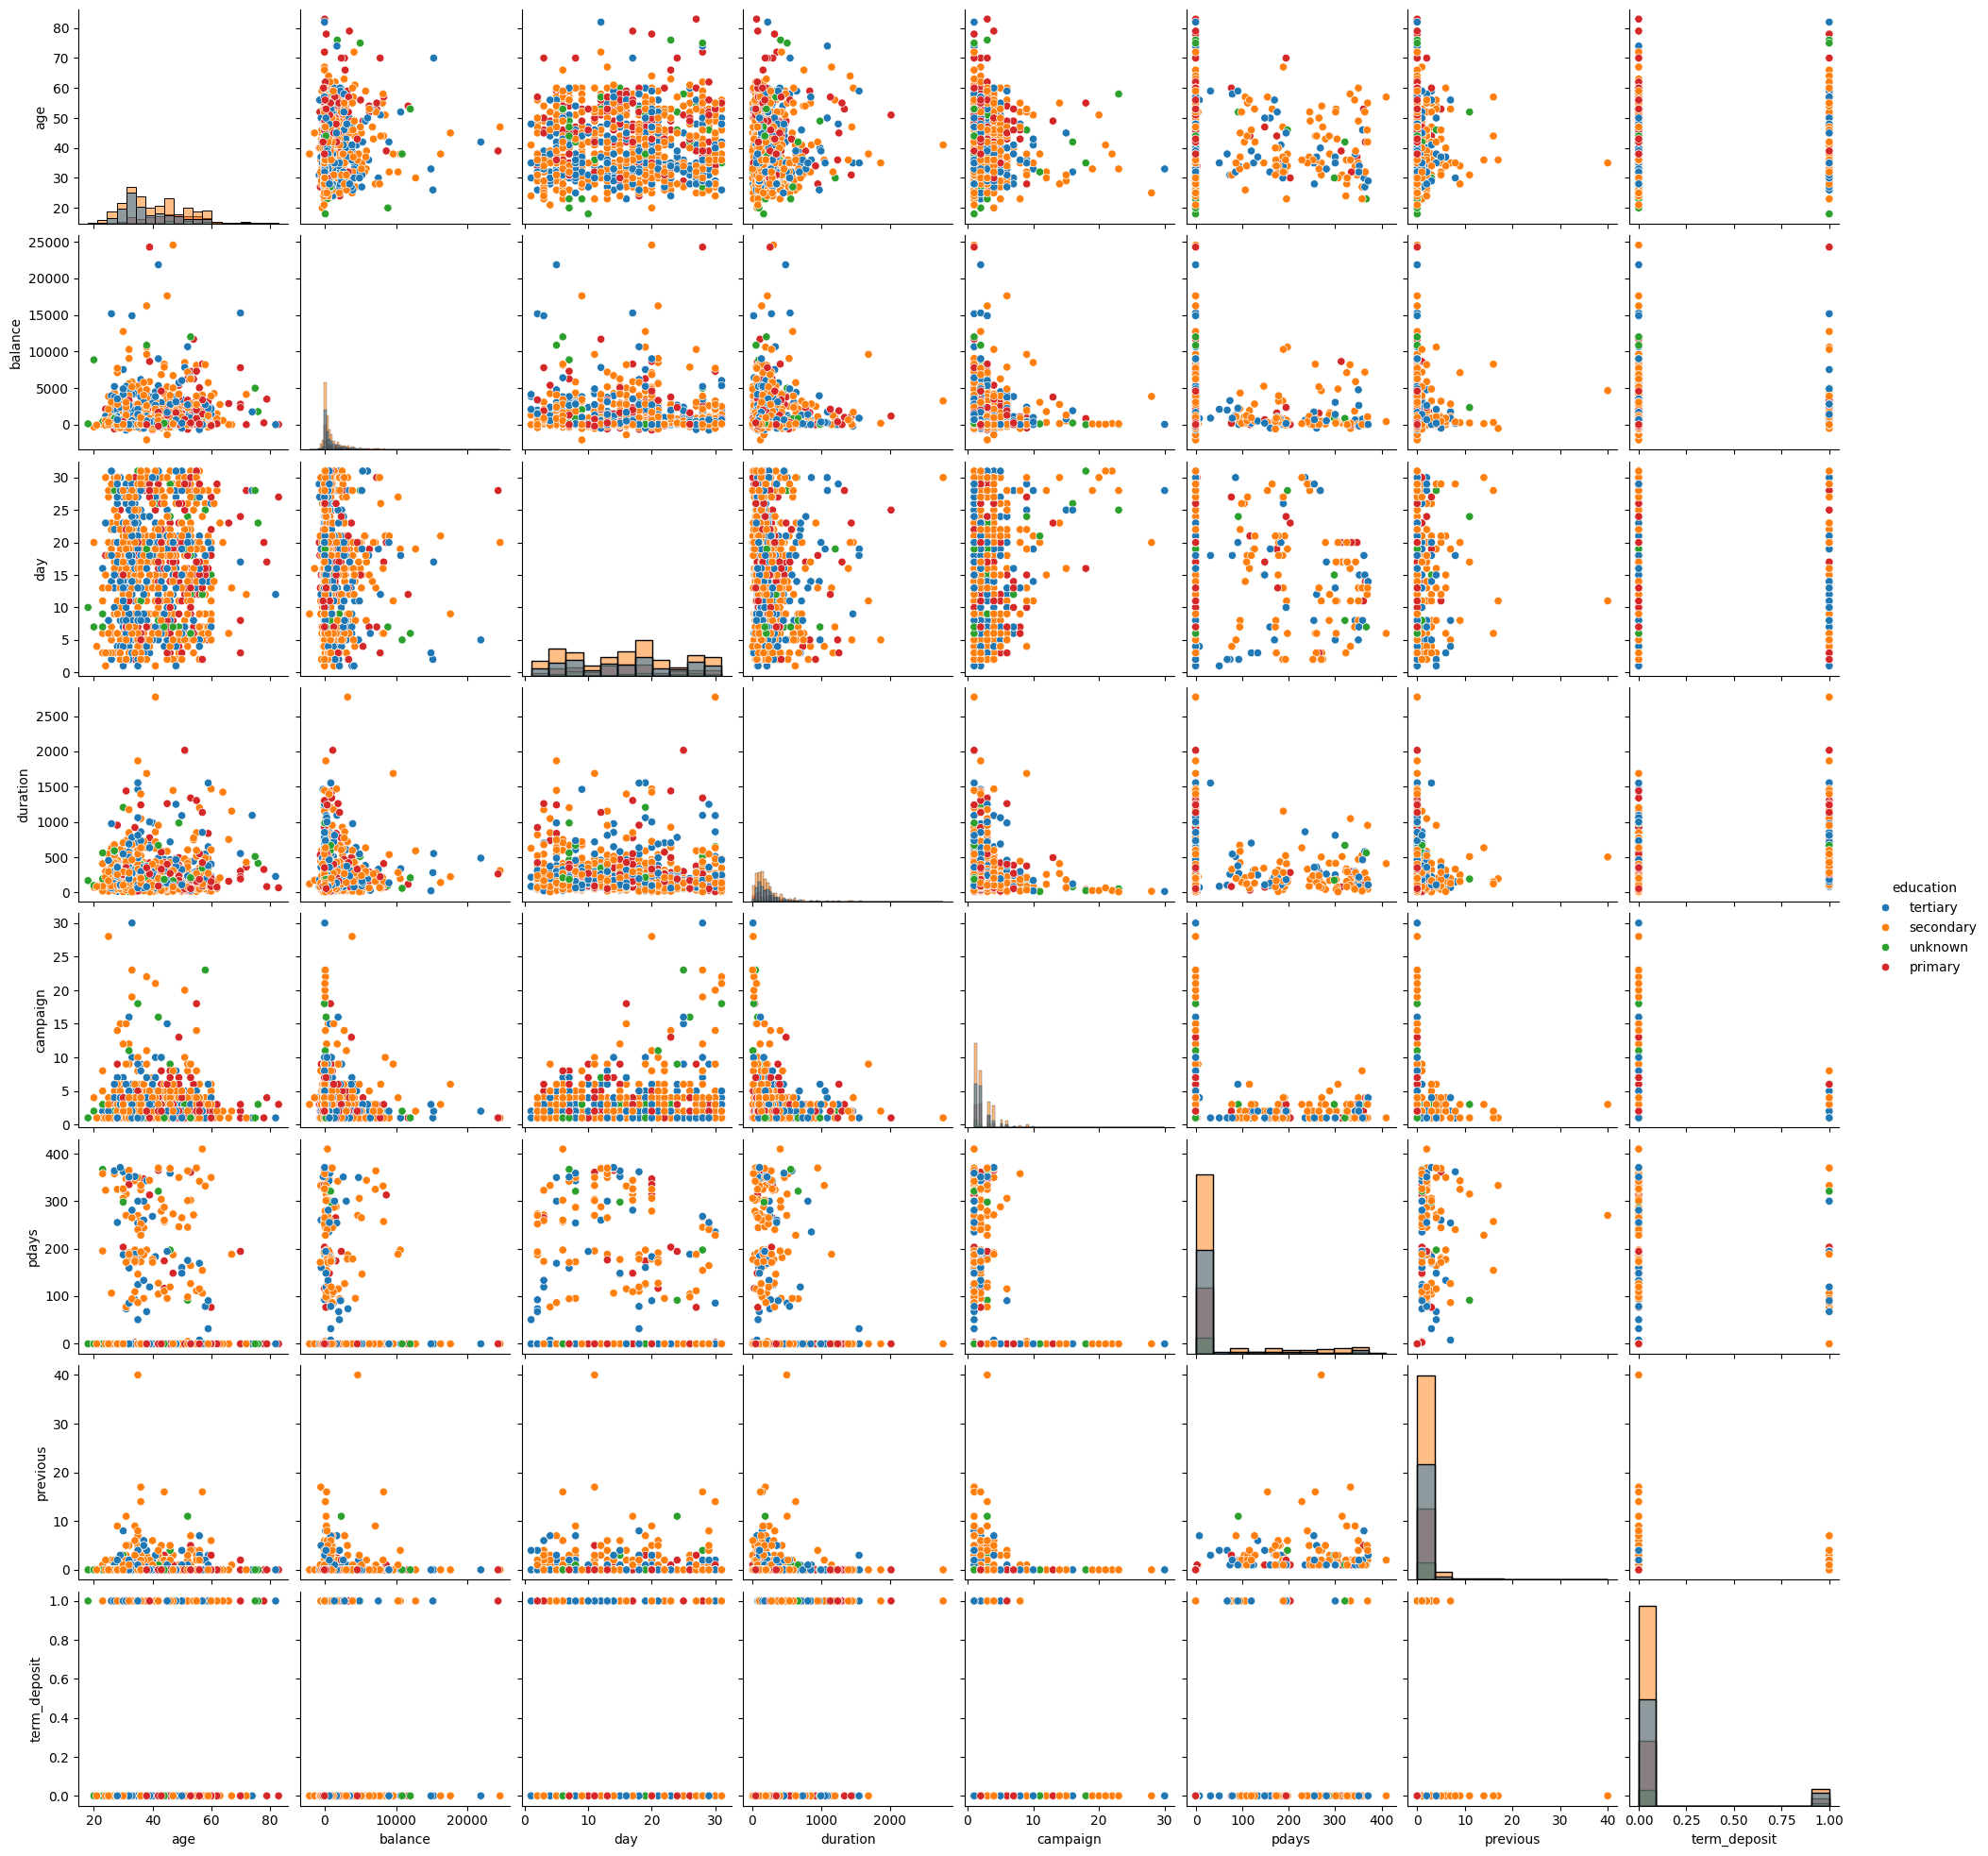

In [9]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue="education", diag_kind="hist")
pass

# 3. Обработка пропущенных значений

In [10]:
data_raw.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

Пропущенных значений нет.

# 4. Обработка категориальных признаков

Обработаем категориальные признаки заменив тип с `object` на `category`. А затем каждую категорию заменим на бинарные признаки.

In [11]:
data_raw["job"] = data_raw["job"].astype("category")
data_raw["marital"] = data_raw["marital"].astype("category")
data_raw["education"] = data_raw["education"].astype("category")
data_raw["contact"] = data_raw["contact"].astype("category")
data_raw["month"] = data_raw["month"].astype("category")
data_raw["poutcome"] = data_raw["poutcome"].astype("category")
data_raw.describe(include=["category"])

,job,marital,education,contact,month,poutcome
count,42639,42639,42639,42639,42639,42639
unique,12,3,4,3,12,4
top,blue-collar,married,secondary,cellular,may,unknown
freq,9536,25868,22066,27218,13532,36085


In [12]:
data = pd.get_dummies(data_raw)

# 5. Нормализация

Произведем нормализация для всех числовых признаков.

In [13]:
from sklearn.preprocessing import MinMaxScaler
data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns, index=data.index)
data.describe()


,age,balance,day,duration,campaign,pdays,previous,term_deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,...,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,0.295959,0.084895,0.495159,0.052045,0.029297,0.065492,0.001693,0.092896,0.112808,0.223645,...,0.120265,0.006051,0.317362,0.091348,0.012149,0.006614,0.100167,0.035578,0.017965,0.846291
std,0.132471,0.027341,0.276463,0.052534,0.051025,0.171400,0.007879,0.290290,0.316361,0.416692,...,0.325276,0.077552,0.465455,0.288107,0.109550,0.081056,0.300225,0.185237,0.132825,0.360674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073366,0.233333,0.020537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.076698,0.500000,0.035990,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,0.085346,0.666667,0.064050,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Классификация

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [15]:
X = data.drop(["term_deposit"], axis=1)
y = data["term_deposit"]

print(X.shape)
print(y.shape)

(42639, 51)
(42639,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(28568, 14071)

In [17]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.9227457294875385, Test: 0.9093170350366001'

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.9141346961635396, Test: 0.9083931490299197'

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.9136096331559788, Test: 0.90903276241916'

# 7. Вывод

* При увеличение числа соседей в алгоритме ближайших соседей растет и точность, следовательно можно подобрать такое значение при котором достигнится максимальная точность.
* Алгоритм показывает достаточно высокие точности, что по моему предположению связанно с несбалансированностью классов.

### Задание 2 (к 29.12)

##  Подбор гиперпараметров

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Подбор количества нейронов в однослойной сети

In [21]:
n = 4
hidden_layer_size = np.linspace(10, 200, n).astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in hidden_layer_size:
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                        solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Train: Min error=0.028283394007280874, number of neurons=200
Test: Min error=0.07995167365503518, number of neurons=10


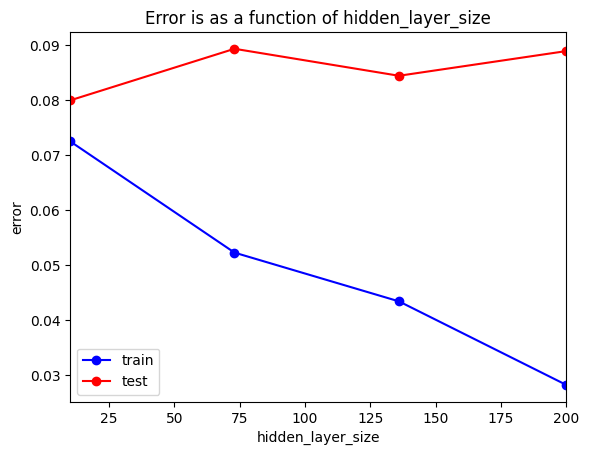

In [22]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: max accuracy=0.9717166059927191, number of neurons=200
Test: max accuracy=0.9200483263449648, number of neurons=10


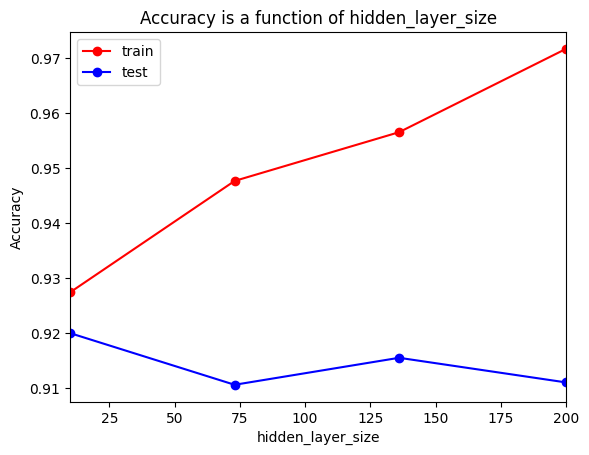

In [23]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

### Подбор количества нейронов в двуслойной сети

In [24]:
n = 4
hidden_layer_size = np.linspace(10, 200, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in enumerate(hidden_layer_size):
    for j, size_2 in enumerate(hidden_layer_size):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                            solver='adam', activation='relu', max_iter=1000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

Train: Min error=0.008295995519462335, number of neurons=136,200
Test: Min error=0.08030701442683534, number of neurons=10,10


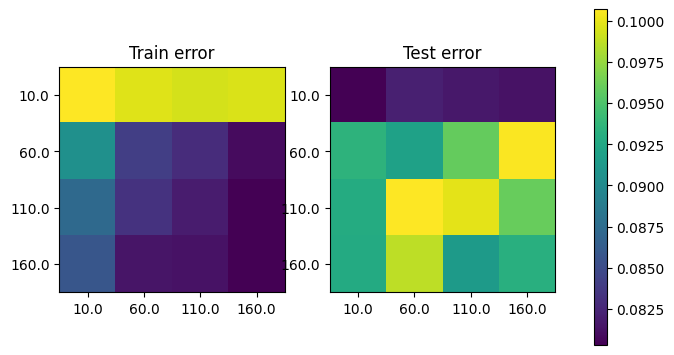

In [25]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(10, 200, 200 / n))
plt.yticks(np.arange(n), np.arange(10, 200, 200 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(10, 200, 200 / n))
plt.yticks(np.arange(n), np.arange(10, 200, 200 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err) // n],
        hidden_layer_size[np.argmin(train_err) % n]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err) // n],
        hidden_layer_size[np.argmin(test_err) % n]))

Train: Max accuracy=0.9917040044805376, number of neurons=136,200
Test: Max accuracy=0.9196929855731647, number of neurons=10,10


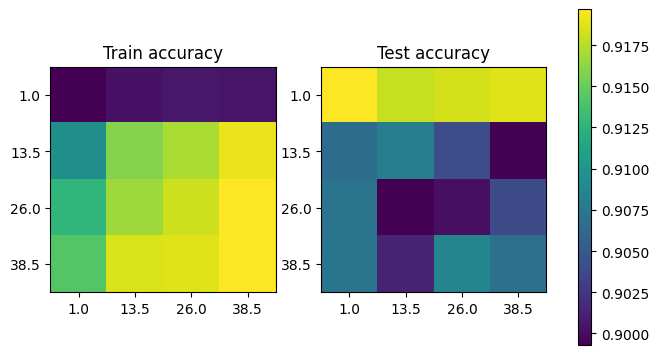

In [26]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc) // n],
        hidden_layer_size[np.argmax(train_acc) % n]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc) // n],
        hidden_layer_size[np.argmax(test_acc) % n]))

### Подбор параметра регуляризации

In [27]:
alphas = np.logspace(-3, 2, 5)
test_err, train_err = [], []
train_acc, test_acc = [], []


for alpha in alphas:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10,10,), 
                            solver='adam', activation='relu', max_iter=1000, random_state=13)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

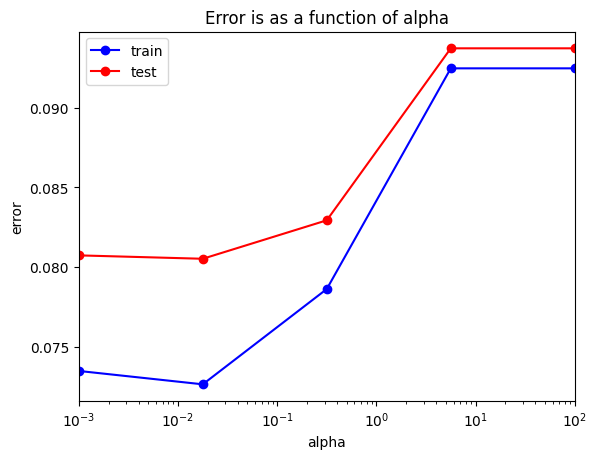

In [28]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

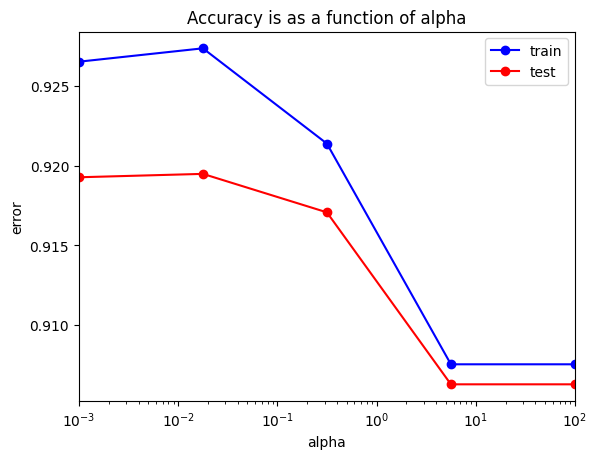

In [29]:
plt.semilogx(alphas, train_acc, 'b-o', label = 'train')
plt.semilogx(alphas, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Accuracy is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

### Логистическая регрессия

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=13, max_iter=100000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Mean train: {np.mean(y_train != y_train_pred)}")
print(f"Mean test: {np.mean(y_test != y_test_pred)}" )

print(f"Accuracy train: {accuracy_score(y_train, y_train_pred)}" )
print(f"Accuracy test: {accuracy_score(y_test, y_test_pred)}" )

Mean train: 0.0834500140016802
Mean test: 0.08343401321867672
Accuracy train: 0.9165499859983198
Accuracy test: 0.9165659867813233


### Случайный лес

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=13)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Mean train: {np.mean(y_train != y_train_pred)}")
print(f"Mean test: {np.mean(y_test != y_test_pred)}" )

print(f"Accuracy train: {accuracy_score(y_train, y_train_pred)}" )
print(f"Accuracy test: {accuracy_score(y_test, y_test_pred)}" )

Mean train: 0.0
Mean test: 0.08300760429251652
Accuracy train: 1.0
Accuracy test: 0.9169923957074835


## Выводы

### 1. Подбор числа нейронов в однослойной моделе

* Исходя из исследования, за оптимальный размер скрытого слоя возьмем 10 нейронов. (accuracy=0.91)
* При увеличение количества нейронов можем наблюдать переобучение модели.

### 2. Подбор числа нейронов в двуслойной моделе

* За оптимальный размер скрытых слоев возьмем 10 и 10 нейронов. (accuracy=0.91)
* Можем заметить, что при добавление второго скрытого слоя точность не изменяется, следовательно для решения задачи будет достаточно однослойной сети
* Так же как и в подборе однослойной модели в двуслойной модели с ростом количества нейронов наблюдается переобучение.

### 3. Подбор параметра регуляризации

* При выборе параметра регуляризации переобучения не наблюдается.
* При lambda > 10e-3 начинается рост ошибки и снижение accuracy. То есть с ростом lamda уменьшаются веса модели и стремятся к нулю.

### 4. Логистическая регрессия и случайный лес

* Логистическая регрессия и случайный лес показывают результаты, сопоставимые с рассмотренными моделями нейронных сетей.